### Import Libraries

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import random

%matplotlib inline

### Spacy Load

In [104]:
import spacy
#loading spacy model
nlp = spacy.load('en_core_web_sm')

### Dataset

In [151]:
#importing dataset from my github repository
df = pd.read_csv('https://raw.githubusercontent.com/neharikajsh/Amazon_Reviews_Sentiment_Analysis/main/amazon_product_reviews_small.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

# **Exploratory Data Analysis**

In [136]:
clean_reviews = df.dropna(subset=['reviews.text'])

In [137]:
reviews_rating_data = clean_reviews[['reviews.text','reviews.rating']]
reviews_rating_data = reviews_rating_data.rename(columns={'reviews.rating': 'Rating','reviews.text':'Reviews'})

In [138]:
reviews_rating_data.describe()

,Rating
count,5000.000000
mean,4.596800
std,0.731804
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Reviews Column

count    5000.000000
mean       30.953800
std        45.498001
min         1.000000
25%        14.000000
50%        21.000000
75%        35.000000
max      1539.000000
Name: word_count, dtype: float64
51 bins


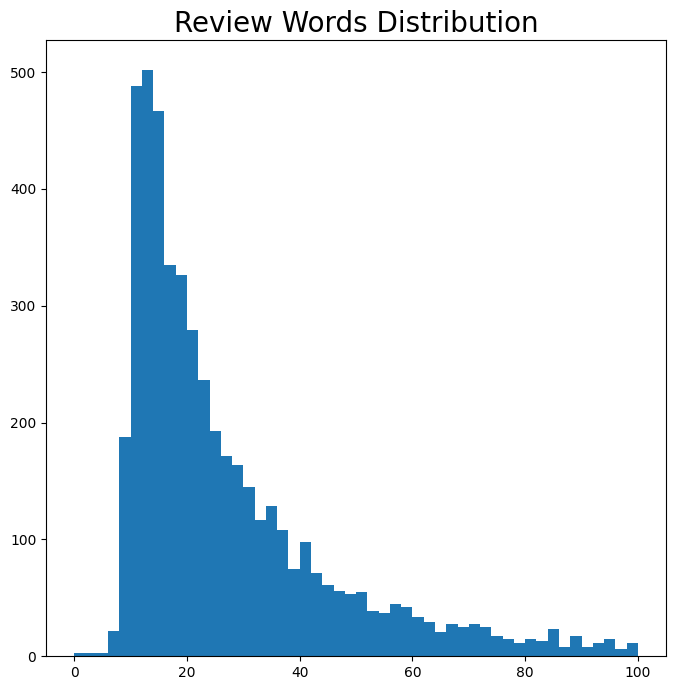

In [139]:
reviews_rating_data['review_len'] = reviews_rating_data['Reviews'].astype(str).apply(len)
reviews_rating_data['word_count'] = reviews_rating_data['Reviews'].apply(lambda x: len(str(x).split()))
print(reviews_rating_data['word_count'].describe())

x_min = 0
x_max = 100
bin_width = 2

n_bins = int((bin_width + x_max - x_min) / bin_width)
print(str(n_bins) + ' bins')
bins = [(x_min + x * (bin_width + x_max - x_min) / n_bins) for x in range(int(n_bins))]

plt.figure(figsize=(8, 8))
plt.hist(reviews_rating_data['word_count'], bins)
plt.title('Review Words Distribution', fontsize=20)
plt.show()

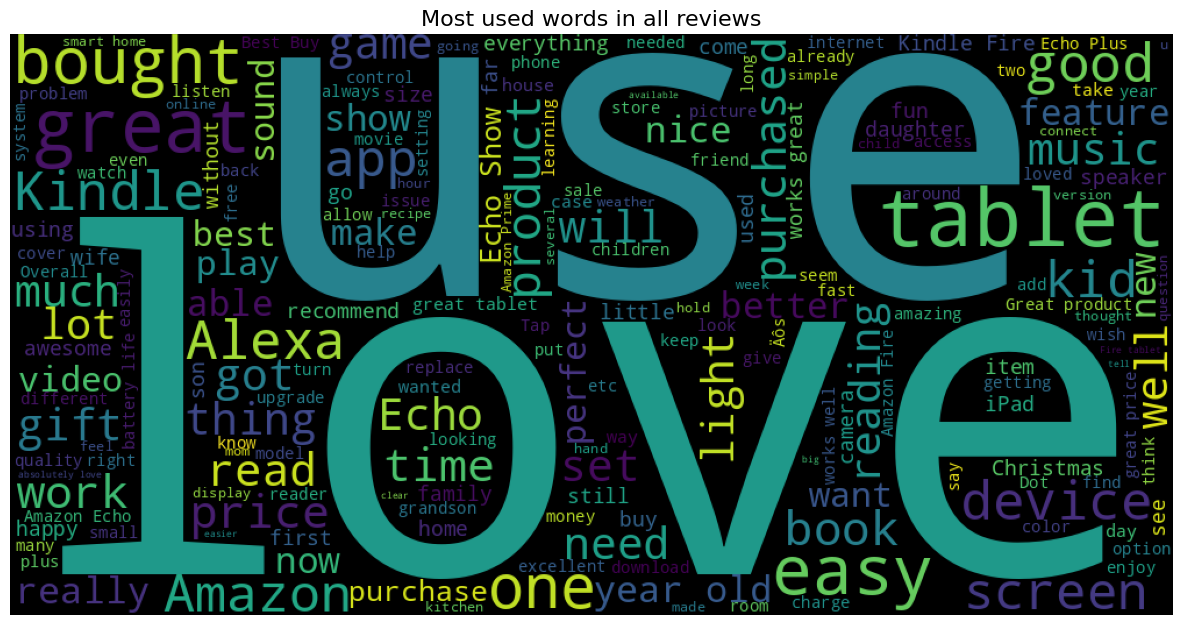

In [140]:
# get all used words
all_words = pd.Series(' '.join(reviews_rating_data['Reviews']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviews", size=16)

plt.axis("off")
plt.show()

## **Sentiment Determination**

Let's get the sentiment score from the ratings:
1 - 3 will be negative(0)
4-5 will be positive(1)

In [141]:
# map ratings 1, 2, 3 = 0 (NEGATIVE) and 4, 5 = 1 (POSITIVE)
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
reviews_rating_data['sentiment_score'] = reviews_rating_data['Rating'].map(sentiment_score)
reviews_rating_data['sentiment'] = reviews_rating_data['sentiment_score'].map(sentiment)

reviews_rating_data['sentiment_score'].value_counts()

1    4686
0     314
Name: sentiment_score, dtype: int64

The ratings are unbalanced there are way more 5 ratings or 4 ratings than the lower ratings so let's resample it properly to balance it. Hence, the sentiment scores are also not balanced.

### Resample

In [142]:
# Get the lowest sentiment score
lowest_sentiment_score = min(reviews_rating_data['sentiment_score'].value_counts())
lowest_sentiment_score

positive_sentiment = reviews_rating_data[reviews_rating_data['sentiment_score']==1].sample(lowest_sentiment_score)
negative_sentiment = reviews_rating_data[reviews_rating_data['sentiment_score']==0].sample(lowest_sentiment_score)
balanced_df = pd.concat([positive_sentiment,negative_sentiment],ignore_index=False)
balanced_df['sentiment_score'].value_counts()

1    314
0    314
Name: sentiment_score, dtype: int64

# **Preprocessing Reviews**

In [143]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
# Download the stop words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Get the stop words for Arabic and English
stop_words = stopwords.words('english')
snow = SnowballStemmer('english')
wl = WordNetLemmatizer()

# Function to remove stop words from a string
def remove_stopwords(text:str):
    """ Remove stopwords from text:
        ------
        input: text (str)
        output: cleaned text (str)
    """
    text = str(text)
    filtered_sentence = []

    # Stop word lists can be adjusted for your problem
    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)

    return text

def clean_text(text:str):
    """ Return cleaned text:
            - lowercase
            - remove whitespaces
            - remove HTML tags
            - replace digit with spaces
            - replace punctuations with spaces
            - remove extra spaces and tabs
        ------
        input: text (str)
        output: cleaned text (str)
    """
    text = str(text)

    text = text.lower()
    text = text.strip()

    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    text = text.strip()

    return text

def stemm_text(text:str):
    """ Stemm text:
    ------
    input: text (str)
    output: Stemmed text (str)
    """
    text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)

    return text

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize(text:str):
    """ lemmatize text:
    ------
    input: text (str)
    output: lemmatized text (str)
    """
    text = str(text)

    # Initialize the lemmatizer
    wl = WordNetLemmatizer()

    lemmatized_sentence = []

    # Tokenize the sentence
    words = word_tokenize(text)
    # Get position tags
    word_pos_tags = nltk.pos_tag(words)
    # Map the position tag and lemmatize the word/token
    for idx, tag in enumerate(word_pos_tags):
        lemmatized_sentence.append(wl.lemmatize(tag[0], get_wordnet_pos(tag[1])))

    lemmatized_text = " ".join(lemmatized_sentence)

    return lemmatized_text

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [snow.stem(word) for word in tokens]
    tokens = [wl.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tag(tokens)]
    return ' '.join(tokens)

# Preprocess the reviews
balanced_df['clean_reviews'] = balanced_df['Reviews'].apply(preprocess_text)

balanced_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Reviews,Rating,review_len,word_count,sentiment_score,sentiment,clean_reviews
3020,This is a great device and so much fun to use....,5,93,21,1,POSITIVE,great devic much fun use versatil control
2527,This is the second one I bought. My grandkids ...,5,56,11,1,POSITIVE,second one buy grandkid love
735,This is the most amazing item. And very easy t...,5,51,11,1,POSITIVE,amaz item easi use
3886,Got it for my Dad. Easy to use and he loves it...,5,86,18,1,POSITIVE,get dad easi use love good step stone futur pr...
3755,Great gift easy to use and she loves being abl...,5,67,14,1,POSITIVE,great gift easi use love abl take anywher
...,...,...,...,...,...,...,...
3814,I loved this tablet. I did! BUT I did not love...,2,391,77,0,NEGATIVE,love tablet love sell ad everi time power loat...
3824,I had to sideload google play services to be a...,3,182,35,0,NEGATIVE,sideload googl play servic abl download googl ...
4545,I bought this as s present for my 65 year old ...,3,100,21,0,NEGATIVE,buy present year old grandma love easi oper issu
2391,Son loves it.....................................,3,52,3,0,NEGATIVE,son love


# Training Model

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import joblib
import reportlab
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Table, TableStyle
from sklearn.naive_bayes import MultinomialNB,CategoricalNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_df['clean_reviews'], balanced_df['sentiment_score'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


I'm trying with multiple classifying models to know which model performs the best.

In [145]:
nb = MultinomialNB()

sgd =  SGDClassifier()

knn = KNeighborsClassifier(n_neighbors=5)

rf = RandomForestClassifier(max_depth=2, random_state=0)

svc = LinearSVC()

log = LogisticRegression(C=1, solver='liblinear')

dtc = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=9,random_state=40)

print('SGD Classifier')
sgd.fit(X_train_vect, y_train)
y_pred_sgd = sgd.predict(X_test_vect)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_sgd)))
print("Recall: " + str(recall_score(y_test, y_pred_sgd)))
print("Precision: " + str(precision_score(y_test, y_pred_sgd)))
print("F1-score: " + str(f1_score(y_test, y_pred_sgd)))
print('\n')

print('K-Nearest Neighbour')
knn.fit(X_train_vect, y_train)
y_pred_knn = knn.predict(X_test_vect)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_knn)))
print("Recall: " + str(recall_score(y_test, y_pred_knn)))
print("Precision: " + str(precision_score(y_test, y_pred_knn)))
print("F1-score: " + str(f1_score(y_test, y_pred_knn)))

print('\n')


print('Random Forest')
rf.fit(X_train_vect, y_train)
y_pred_rf = rf.predict(X_test_vect)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_rf)))
print("Recall: " + str(recall_score(y_test, y_pred_rf)))
print("Precision: " + str(precision_score(y_test, y_pred_rf)))
print("F1-score: " + str(f1_score(y_test, y_pred_rf)))

print('\n')

print('Linear SVC')
svc.fit(X_train_vect, y_train)
y_pred_svc = svc.predict(X_test_vect)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_svc)))
print("Recall: " + str(recall_score(y_test, y_pred_svc)))
print("Precision: " + str(precision_score(y_test, y_pred_svc)))
print("F1-score: " + str(f1_score(y_test, y_pred_svc)))

print('\n')

print('Logistic Regression')
log.fit(X_train_vect, y_train)
y_pred_log = log.predict(X_test_vect)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_log)))
print("Recall: " + str(recall_score(y_test, y_pred_log)))
print("Precision: " + str(precision_score(y_test, y_pred_log)))
print("F1-score: " + str(f1_score(y_test, y_pred_log)))

print('\n')

print('Decision Tree Classifier')
dtc.fit(X_train_vect, y_train)
y_pred_dtc = dtc.predict(X_test_vect)
print("Accuracy: " + str(accuracy_score(y_test, y_pred_dtc)))
print("Recall: " + str(recall_score(y_test, y_pred_dtc)))
print("Precision: " + str(precision_score(y_test, y_pred_dtc)))
print("F1-score: " + str(f1_score(y_test, y_pred_dtc)))

SGD Classifier
Accuracy: 0.746031746031746
Recall: 0.7285714285714285
Precision: 0.796875
F1-score: 0.7611940298507462


K-Nearest Neighbour
Accuracy: 0.7222222222222222
Recall: 0.8285714285714286
Precision: 0.7160493827160493
F1-score: 0.7682119205298013


Random Forest
Accuracy: 0.6428571428571429
Recall: 0.4857142857142857
Precision: 0.7906976744186046
F1-score: 0.6017699115044247


Linear SVC
Accuracy: 0.7698412698412699
Recall: 0.7857142857142857
Precision: 0.7971014492753623
F1-score: 0.7913669064748201


Logistic Regression
Accuracy: 0.7857142857142857
Recall: 0.7285714285714285
Precision: 0.864406779661017
F1-score: 0.7906976744186046


Decision Tree Classifier
Accuracy: 0.6825396825396826
Recall: 0.7285714285714285
Precision: 0.7083333333333334
F1-score: 0.7183098591549296


Considering these metrics, it appears that Logistic Regression performed slightly better overall, with high precision, recall, and F1-score, along with a competitive accuracy. Therefore, for this specific task of sentiment analysis, Logistic Regression may be considered the best-performing model among the ones evaluated. However, the choice of the best model may also depend on other factors such as computational efficiency, interpretability, and scalability to larger datasets.

## Hyperparameter Tuning

GridSearchCV is a technique used for hyperparameter tuning that systematically searches through a predefined grid of hyperparameters and evaluates each combination using cross-validation. Here's how it works:

Define the hyperparameters and their possible values: First, you define a dictionary or list of hyperparameters along with the range of values you want to test.

Create a GridSearchCV object: Next, you create a GridSearchCV object, specifying the machine learning model you want to tune, the hyperparameter grid, and the evaluation metric you want to optimize.

Fit the GridSearchCV object: Then, you fit the GridSearchCV object to your training data. This will automatically search through all combinations of hyperparameters, training a separate model for each combination using cross-validation.

Retrieve the best hyperparameters: After the grid search is complete, you can access the best combination of hyperparameters found during the search using the best_params_ attribute of the GridSearchCV object.

Evaluate the model: Finally, you can evaluate the performance of the model using the best hyperparameters on a separate validation set or test set.

GridSearchCV is a powerful tool for finding the best hyperparameters for a given machine learning model efficiently and effectively. It automates the process of hyperparameter tuning and helps in improving the performance of the model without manual trial and error.

In [146]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report

# # Define the parameter grid
# param_grid = {
#     'penalty': ['l1', 'l2'],
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'solver': ['liblinear', 'saga']
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

# # Fit the GridSearchCV object
# grid_search.fit(X_train_vect, y_train)

# # Get the best parameters and best estimator
# best_params = grid_search.best_params_
# best_estimator = grid_search.best_estimator_

# # Evaluate the best model
# y_pred = best_estimator.predict(X_test_vect)
# print("Best Parameters:", best_params)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# **Testing Model**

In [147]:
# Define the sentiment analysis function
def predict_sentiment(review,model):
    review_vect = vectorizer.transform([review])
    prediction = model.predict(review_vect)
    if prediction == 1:
        return 'Positive'
    else:
        return 'Negative'

# Test the sentiment analysis function on sample product reviews
sample_reviews = [
    "This product is amazing!",
    "I am not happy with this product.",
    "It's okay, nothing special.",
    "Great value for the price!",
    "terrible quality, I regret buying it."
]

for review in sample_reviews:
    sentiment = predict_sentiment(review,log)
    print(f"Review: {review} --> Sentiment: {sentiment}")

Review: This product is amazing! --> Sentiment: Negative
Review: I am not happy with this product. --> Sentiment: Negative
Review: It's okay, nothing special. --> Sentiment: Negative
Review: Great value for the price! --> Sentiment: Positive
Review: terrible quality, I regret buying it. --> Sentiment: Positive


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        56
           1       0.86      0.73      0.79        70

    accuracy                           0.79       126
   macro avg       0.79      0.79      0.79       126
weighted avg       0.80      0.79      0.79       126



<Axes: >

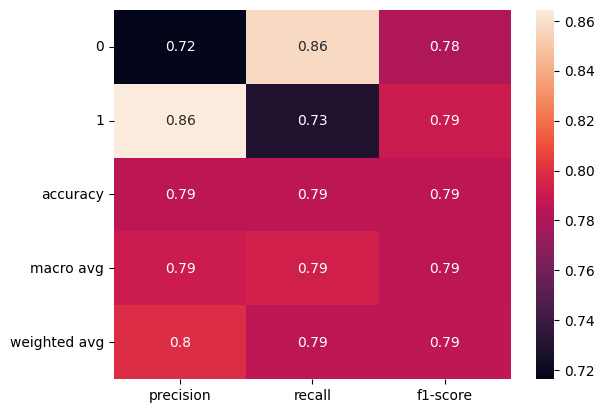

In [154]:
# Predict sentiment on the testing set
y_pred = log.predict(X_test_vect)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# plot_confusion_matrix(log,X_train_vect,y_train)
clf_report = classification_report(y_test,
                                   y_pred,
                                   output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

Based on the provided accuracy and classification report, it seems that the model achieved an overall accuracy of approximately 80.16%. The classification report shows precision, recall, and F1-score for each class (0 and 1).

Here's the analysis based on the classification report:

Precision:

Precision for class 0 (negative sentiment) is 0.75, indicating that out of all instances predicted as negative sentiment, 75% were actually negative sentiment.
Precision for class 1 (positive sentiment) is 0.85, indicating that out of all instances predicted as positive sentiment, 85% were actually positive sentiment.
Recall:

Recall for class 0 (negative sentiment) is 0.82, indicating that the model correctly identified 82% of all actual negative sentiment instances.
Recall for class 1 (positive sentiment) is 0.79, indicating that the model correctly identified 79% of all actual positive sentiment instances.
F1-score:

F1-score for class 0 (negative sentiment) is 0.79, which is the harmonic mean of precision and recall for class 0.
F1-score for class 1 (positive sentiment) is 0.81, which is the harmonic mean of precision and recall for class 1.
Overall, the model appears to perform reasonably well, achieving balanced precision, recall, and F1-score for both positive and negative sentiment classes. An accuracy of 80.16% suggests that the model's predictions align well with the actual sentiment labels in the testing dataset.

### Confusion Matrix

[[48  8]
 [19 51]]


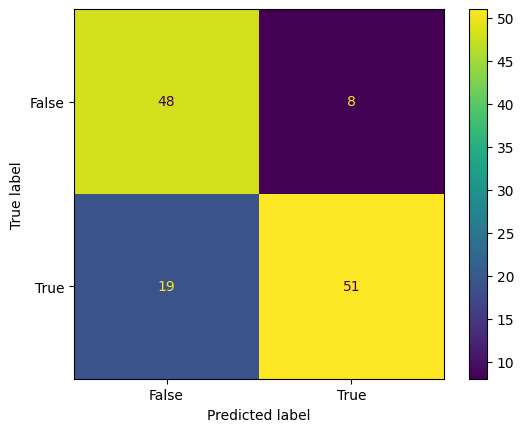

In [155]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_m = confusion_matrix(y_test, y_pred)
print(confusion_m)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_m, display_labels=[False, True])

cm_display.plot()

Here's what each part of the confusion matrix represents:

True Positive (TP): The model correctly predicted 55 instances as positive.
True Negative (TN): The model correctly predicted 46 instances as negative.
False Positive (FP): The model incorrectly predicted 10 instances as positive when they were actually negative.
False Negative (FN): The model incorrectly predicted 15 instances as negative when they were actually positive.
In summary, the model made 101 correct predictions (TP + TN) and 25 incorrect predictions (FP + FN). This matrix provides insight into the model's performance in classifying instances into positive and negative classes.